## 빅데이터 실습

### 제주도 핫플레이스 웹크롤링

#### 셀레니움 사용

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import unicodedata  # 유니코드 데이터 처리 모듈
import re   # 정규식 처리 모듈
import time
from PIL import Image,ImageOps

In [162]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

##### 크롬 실행

In [40]:
driver = webdriver.Chrome()

##### 인스타그램 접속

In [41]:
driver.get('https://www.instagram.com')
time.sleep(2.0)

### 자동로그인처리

In [42]:
# 인스타그램 사용자 이름(이메일) 정보 입력
email = 'personar95@gmail.com'
input_id = driver.find_element(By.NAME,'username')
input_id.clear()
input_id.send_keys(email)

# 인스타그램 비밀번호 입력
password = '!@#580923%^&'
input_pw = driver.find_element(By.NAME,'password')
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(2.0)

In [44]:
## 검색결과 URL 함수
def searchInstargram(word):
    url = f'https://www.instagram.com/explore/tags/{word}'
    return url

##### 태그로 검색시 30개 이사 검색안됨
- 한 그룹의 게시물로 검색

In [45]:
driver.get(searchInstargram('제주도맛집'))

In [55]:
driver.get('https://www.instagram.com/jeju__nadri')

##### 게시글 클릭 후 게시글 정보 가져오기

In [56]:
# 첫번째 게시글 클릭
first = driver.find_elements(By.CLASS_NAME,'_aagw')[0]
first.click()
time.sleep(2.0)

In [ ]:
## 게시글 정보 가져오기
def getContent(driver):
    pass

In [93]:
## 게시글 가져오기 로직
## 1. HTML 코드 가져오기
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')



## 2-1. 팝업 본문내용 가져오기
#content = soup.select('div._a9zr')[0].text

#content.split('📍')[1]

## 2-2. 팝업 본문내용 가게명 가져오기
content = soup.select('div._a9zr>div>h1')[0].text

firstIndex = str(soup.select('div._a9zr>div>h1')[0]).index('>')
lastIndex = str(soup.select('div._a9zr>div>h1')[0]).index('<br/>')
shopName = str(soup.select('div._a9zr>div>h1')[0])[firstIndex+1:lastIndex]


## 3. 본문내용에서 해시태그 가져오기(정규식활용)
tags = re.findall(r'#[^\s#,\\]+', content)

## 4. 포스터 작성일자
date = soup.select('time.x1p4m5qa')[0]['datetime'][:10]

## 5. 좋아요 수 가져오기
like = soup.select('span.xdj266r.x11i5rnm.x1vvkbs')[3].text

## 6. 위치정보



### 워드 클라우드(Word Cloud)
- 태그 중에서 빈도수가 높은 태그는 글자를 크게, 빈도수가 낮은 태그는 작게 표현해서 마치 구름처럼 나타내는 방법

In [94]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags']

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [115]:
##
raw_total['tags'][31][2:-2].split("', '")[1]

'#카운트다운'

In [117]:
from tqdm import tqdm

In [122]:
tagAllList=[]

for tags in tqdm(raw_total['tags']):
    taglist=tags[2:-2].split("', '")
    for tag in taglist:
        tagAllList.append(tag)


100%|██████████| 8801/8801 [00:00<00:00, 238677.30it/s]


In [123]:
## 해시태그 출현 빈도 집계
from collections import Counter

In [203]:
tagcounts = Counter(tagAllList)
tagcounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [148]:
## 맛집 이외의 해시태그는 제외
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', '#눈썹문신', 
             '#제주자연눈썹', '#제주속눈썹', '', '#서귀포', '#제주도그램', '#선팔', '#제주살이', '#여행스타그램',
             '#제주반영구', '#제주눈썹문신', '#서귀포눈썹문신', '#서귀포남자눈썹문신', '#서귀포자연눈썹',
             '#제주남자눈썹문신', '#서귀포속눈썹', '#서귀포반영구', '#제주스타그램', '#소통', '#맞팔', '#제주메이크업',
             '#daily', '#가족여행', '#jejuisland', '#제주속눈썹연장', '#제주해안도로', '#셀카', '#제주공항',
             '#서귀포문신', '#데일리', '#제주문신']

tagFilterList = []
for tag in tagAllList:
    if tag not in  STOPWORDS:
        tagFilterList.append(tag)


In [169]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tagFilterListcounter = Counter(tagFilterList)
tagFilterListcounter.most_common(50)

In [154]:
sns.set_style('darkgrid')

In [156]:
dfTagCounts = pd.DataFrame(tagFilterListcounter.most_common(30))

In [158]:
dfTagCounts.columns = ['tag','counts']

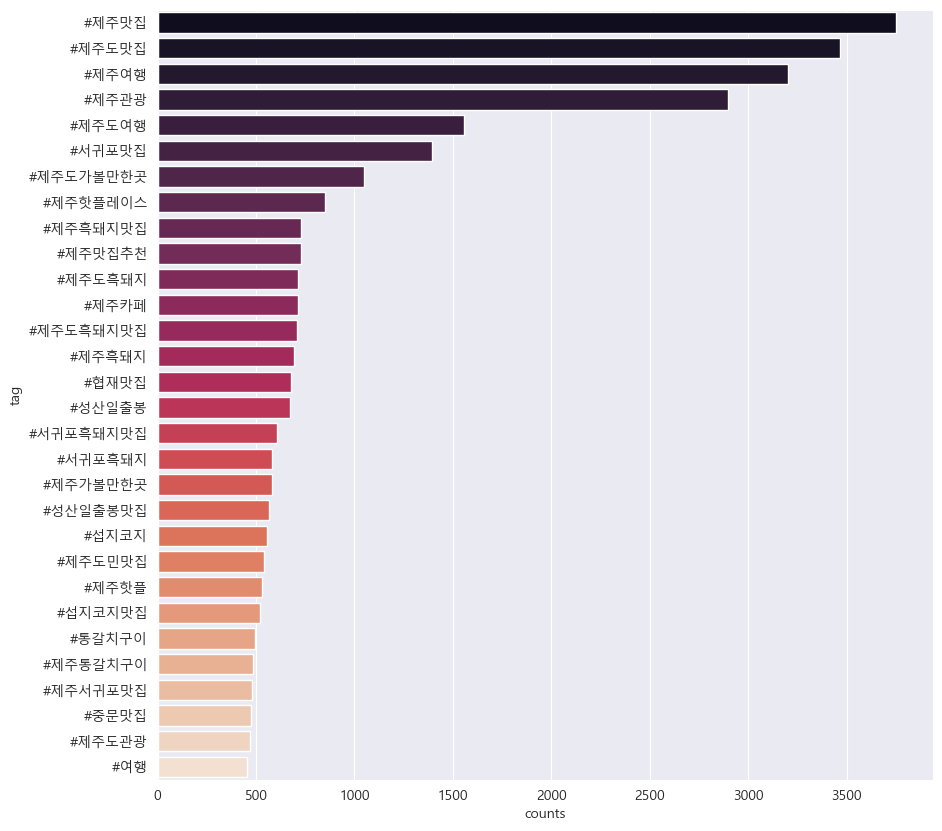

In [176]:
## 막대차트
plt.figure(figsize=(10,10))
## palette 종류: pastel, husl, hls, Set2, paired, rocket, mako
sns.barplot(x='counts', y= 'tag',data=dfTagCounts,palette='rocket')
plt.show()

### 워드클라우드 설치
#### !pip install wordcloud

In [201]:
# 워드 클라우드 라이브러리 사용등록
from wordcloud import WordCloud

In [224]:
import platform
if platform.system() == 'Windows':
    fontpath = 'C:/Windows/Fonts/Hancom HMJE_V.ttf'
elif platform.system() == 'Darwin':
    fontpath = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

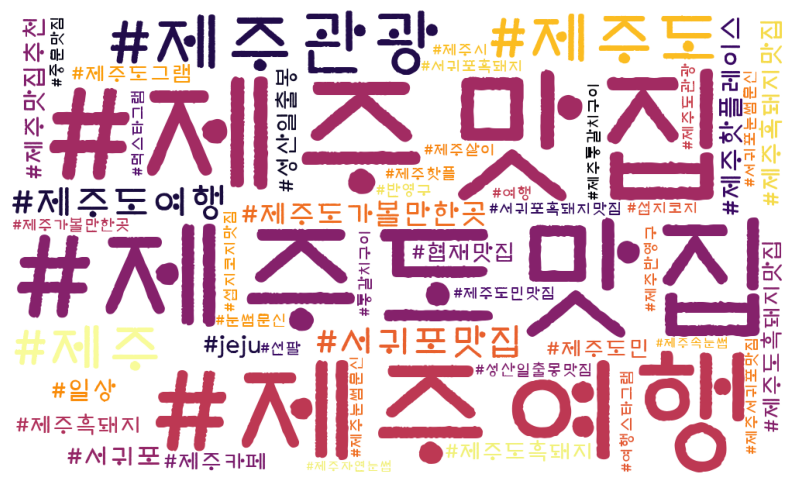

In [225]:
# 워드 클라우드 만들기
tagsLast = dict(tagcounts.most_common(50))
wc = WordCloud(font_path=fontpath, colormap='inferno', background_color='white',
               relative_scaling=0.4, width=1000, height=600,
               max_words=100).generate_from_frequencies(tagsLast)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### 글자체 변경
- [경기천년체](https://www.gg.go.kr/contents/contents.do?ciIdx=679&menuId=2457)

In [227]:
# 폰트경로변경
if platform.system() == 'Windows':
    fontpath = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
elif platform.system() == 'Darwin':
    fontpath = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

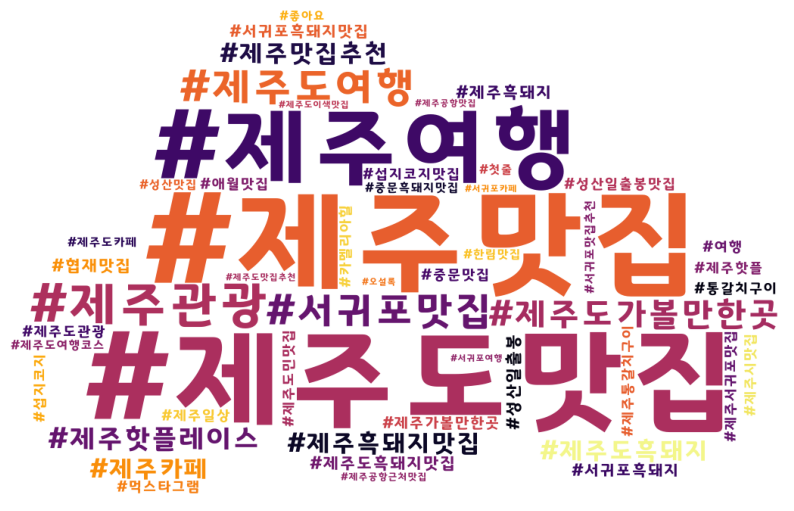

In [235]:
tagsLast = dict(tagFilterListcounter.most_common(50))

mask = np.array(Image.open('./data/could.png'))
mask[mask.sum(axis=2)==0] = 255 # 마스크 이미지를 여백이 255가 되도록 변환

wc = WordCloud(font_path=fontpath, colormap='inferno', background_color='white', mask=mask,
               relative_scaling=0.4, width=1000, height=600,
               max_words=100).generate_from_frequencies(tagsLast)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./data/제주맛집_워드클라우드.png')
plt.show()

#### 지도 시각화
- Folium 사용

##### 주소에 대한 위경도
- [카카오 검색 API](https://developers.kakao.com/)